<a href="https://colab.research.google.com/github/amanichivilkar/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mobile Price Range Prediction**
------
In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is. Data Description -

## **Importing Libraries and Defining Function**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns 
%matplotlib inline
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')


# Scoring
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# classifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble  import  VotingClassifier
from sklearn.ensemble  import  BaggingClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/data/Copy of data_mobile_price_range.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
%pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 7.1 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
!pip3 install lime

     |████████████████████████████████| 275 kB 8.3 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=318c6c894b7420504fdf8354c0a15b988344c885b4a1f5819d67783893ef9f90
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

In [ ]:
pip install shap

     |████████████████████████████████| 564 kB 6.8 MB/s 


In [ ]:
import shap

In [ ]:
def accuracy(lr):
        lr.fit(x_train, y_train)

        # predicted y
        pred_y_train=lr.predict(x_train)
        pred_y_test=lr.predict(x_test)
        

        from sklearn.metrics import accuracy_score, confusion_matrix
        # accuracy_score
        print(f'train_accuracy_score={accuracy_score(pred_y_train,y_train)}') 
        print(f'test_accuracy_score={accuracy_score(pred_y_test,y_test)}')

        # CV_score
        scores = cross_val_score(lr,x, y, scoring = 'accuracy', cv = 5)
        print(f'cv_mean_score={np.mean(scores)}')

In [ ]:
# Fitting and Scoring
def data(lr,row_number):
        lr.fit(x_train, y_train)

        # predicted y
        pred_y_train=lr.predict(x_train)
        pred_y_test=lr.predict(x_test)
        
        # predict_probability    
        lr.predict_proba(x_test)

        from sklearn.metrics import accuracy_score, confusion_matrix
        # accuracy_score
        print(f'train_accuracy_score={accuracy_score(pred_y_train,y_train)}') 
        print(f'test_accuracy_score={accuracy_score(pred_y_test,y_test)}')

        # CV_score
        scores = cross_val_score(lr,x, y, scoring = 'accuracy', cv = 5)
        print(f'cv_mean_score={np.mean(scores)}')

        # Confusion Matrix
        print(f"confusion_matrix_train= \n {confusion_matrix(y_train, pred_y_train, normalize='true')}") # For tain
        print(f"confusion_matrix_test= \n {confusion_matrix(y_test, pred_y_test, normalize='true')}") # For test

        from sklearn.metrics import classification_report
        #classification_report
        print(f'train_report= \n {classification_report(y_train, pred_y_train)}')
        print(f'test_report= \n {classification_report(y_test, pred_y_test)}')

        # LIME Explainability
        explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values, 
                                                    feature_names=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
                                                    'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
                                                    'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi'], 
                                                      class_names=[0,1,2,3], 
                                                      categorical_features=[1,3,5,17,18,19],
                                                      categorical_names=['blue', 'dual_sim', 'four_g','three_g','touch_screen', 'wifi',])
                                                      

        explanation = explainer.explain_instance(x_test.values[row_number], lr.predict_proba, num_features=20)   

        print(f'predicted_value={pred_y_test[row_number]}')
        print(f'Actual_value={y_test.values[row_number]}')
        return(explanation.show_in_notebook(show_all=False))


In [ ]:
# Get the explanation for RandomForest

# def explanation(ml,obs_number):
#     ml.fit(x_train,y_train)
#     y_pred = ml.predict(x_test)

#     explanation = explainer.explain_instance(x_test.values[obs_number], ml.predict, num_features=14)
#     print(f'predicted_value={y_pred[obs_number]}')
#     print(f'Actual_value={y_test.values[obs_number]}')
#     explanation.show_in_notebook(show_all=False)

In [ ]:
# weight of the features for decision tree and random forest
def weight(ml):  
     ml.fit(x_train,y_train)
     y_pred = ml.predict(x_test)

     # plot
     df5=pd.DataFrame({"feature":independent,"weight":ml.feature_importances_}).sort_values('weight',ascending=False).head(10)

     plt.figure(figsize=(10,5))
    
     sns.barplot(x=df5.weight,y=df5.feature).set(title=f'Top 10 Important features for {ml}')
     

In [ ]:
explanation(LinearRegression(),5)

predicted_value=[322.51845892]
Actual_value=[190]


## **Preprosessing Data**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/data/Copy of data_mobile_price_range.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000



Data Description -
*  Battery_power - Total energy a battery can store in one time measured in mAh
*  Blue - Has bluetooth or not
*  Clock_speed - speed at which microprocessor executes instructions
*  Dual_sim - Has dual sim support or not
*  Fc - Front Camera mega pixels
*  Four_g - Has 4G or not
*  Int_memory - Internal Memory in Gigabytes
*  M_dep - Mobile Depth in cm
*  Mobile_wt - Weight of mobile phone
*  N_cores - Number of cores of processor
*  Pc - Primary Camera mega pixels
*  Px_height - Pixel Resolution Height
*  Px_width - Pixel Resolution Width
*  Ram - Random Access Memory in Mega Bytes
*  Sc_h - Screen Height of mobile in cm
*  Sc_w - Screen Width of mobile in cm
*  Talk_time - longest time that a single battery charge will last when you are
*  Three_g - Has 3G or not
*  Touch_screen - Has touch screen or not
*  Wifi - Has wifi or not
*  Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).ld text

## **EDA and Visualization Analysis**

In [ ]:
for i in ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 
          'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g','touch_screen', 'wifi', 'price_range']:

       print(f'{i}={df[i].nunique()}')

battery_power=1094
blue=2
clock_speed=26
dual_sim=2
fc=20
four_g=2
int_memory=63
m_dep=10
mobile_wt=121
n_cores=8
pc=21
px_height=1137
px_width=1109
ram=1562
sc_h=15
sc_w=19
talk_time=19
three_g=2
touch_screen=2
wifi=2
price_range=4


In [ ]:
# Numeric columns
numerical=['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 
          'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# Categorical columns
categorical=['blue', 'dual_sim', 'four_g','three_g','touch_screen', 'wifi','price_range']

# All
all=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 
          'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g','touch_screen', 'wifi']

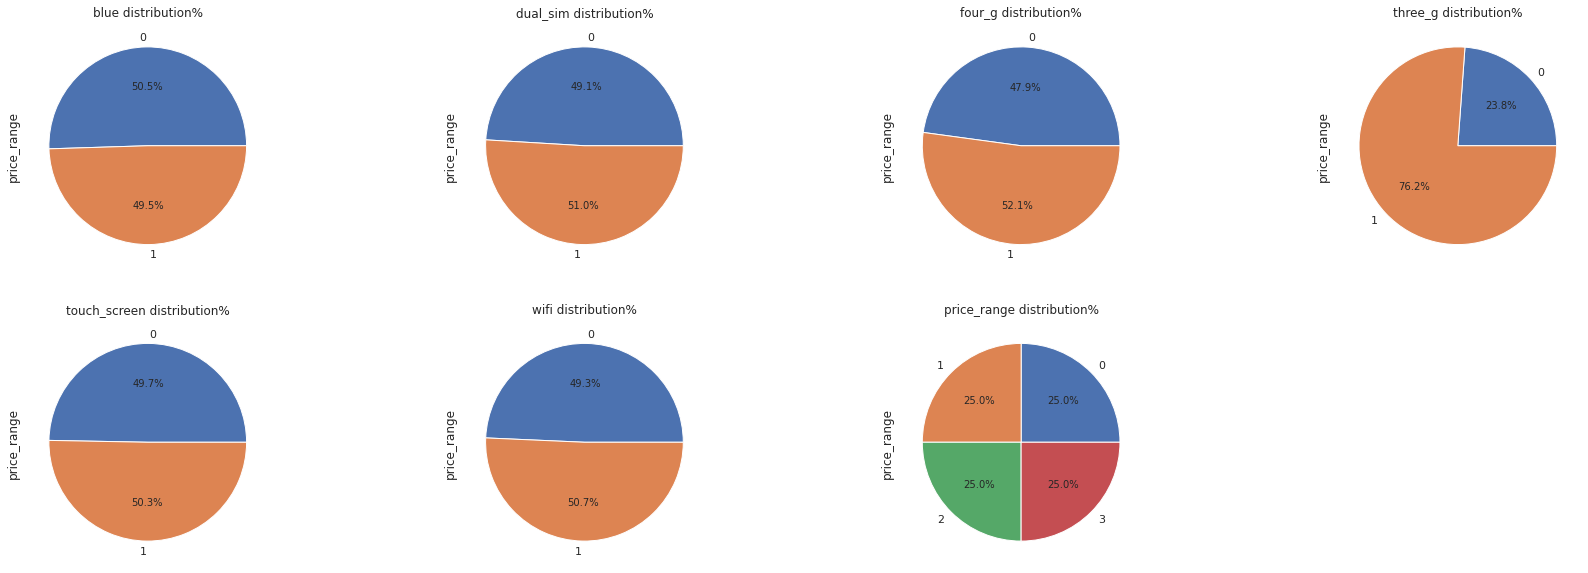

In [ ]:
# count of Categorical column
plt.figure(figsize=(30,10))
i=1
for cat in categorical:
  df3=df.groupby([cat])['price_range'].count()
  
  plt.subplot(2,4,i)
  plt.title(f'{cat} distribution%')
  df3.plot.pie(autopct="%.1f%%")

  i=i+1

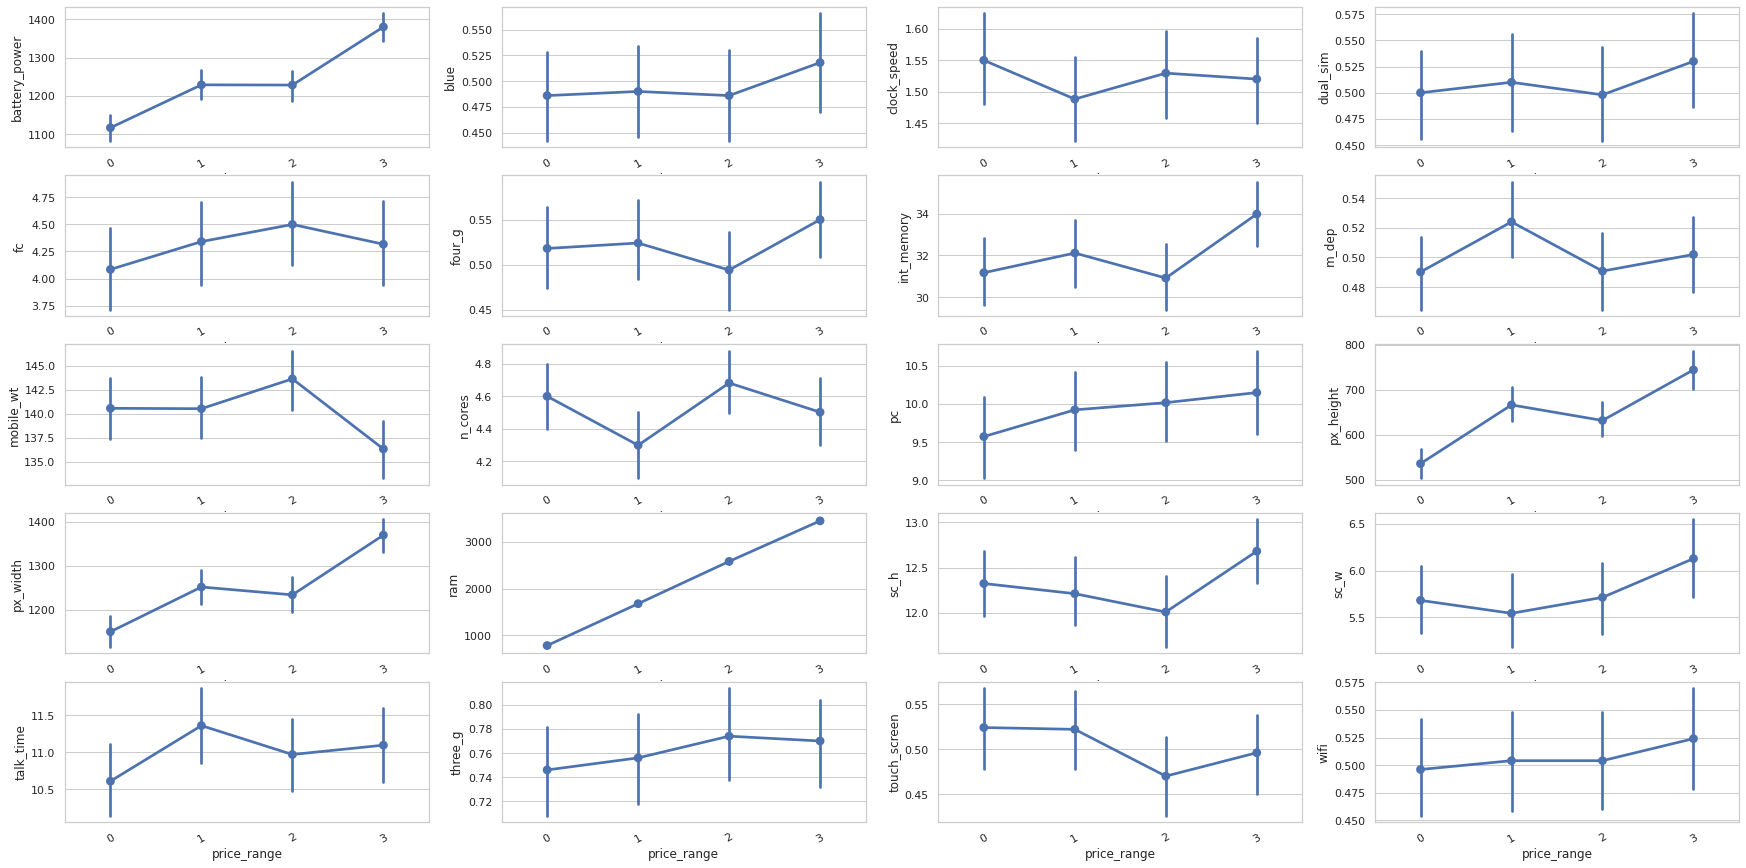

In [ ]:
plt.figure(figsize=(30,15))
i=1
for cat in all:

    plt.subplot(5,4,i)
    sns.pointplot(y=cat, x="price_range", data=df)

    plt.xticks(rotation=30)
   
    i=i+1

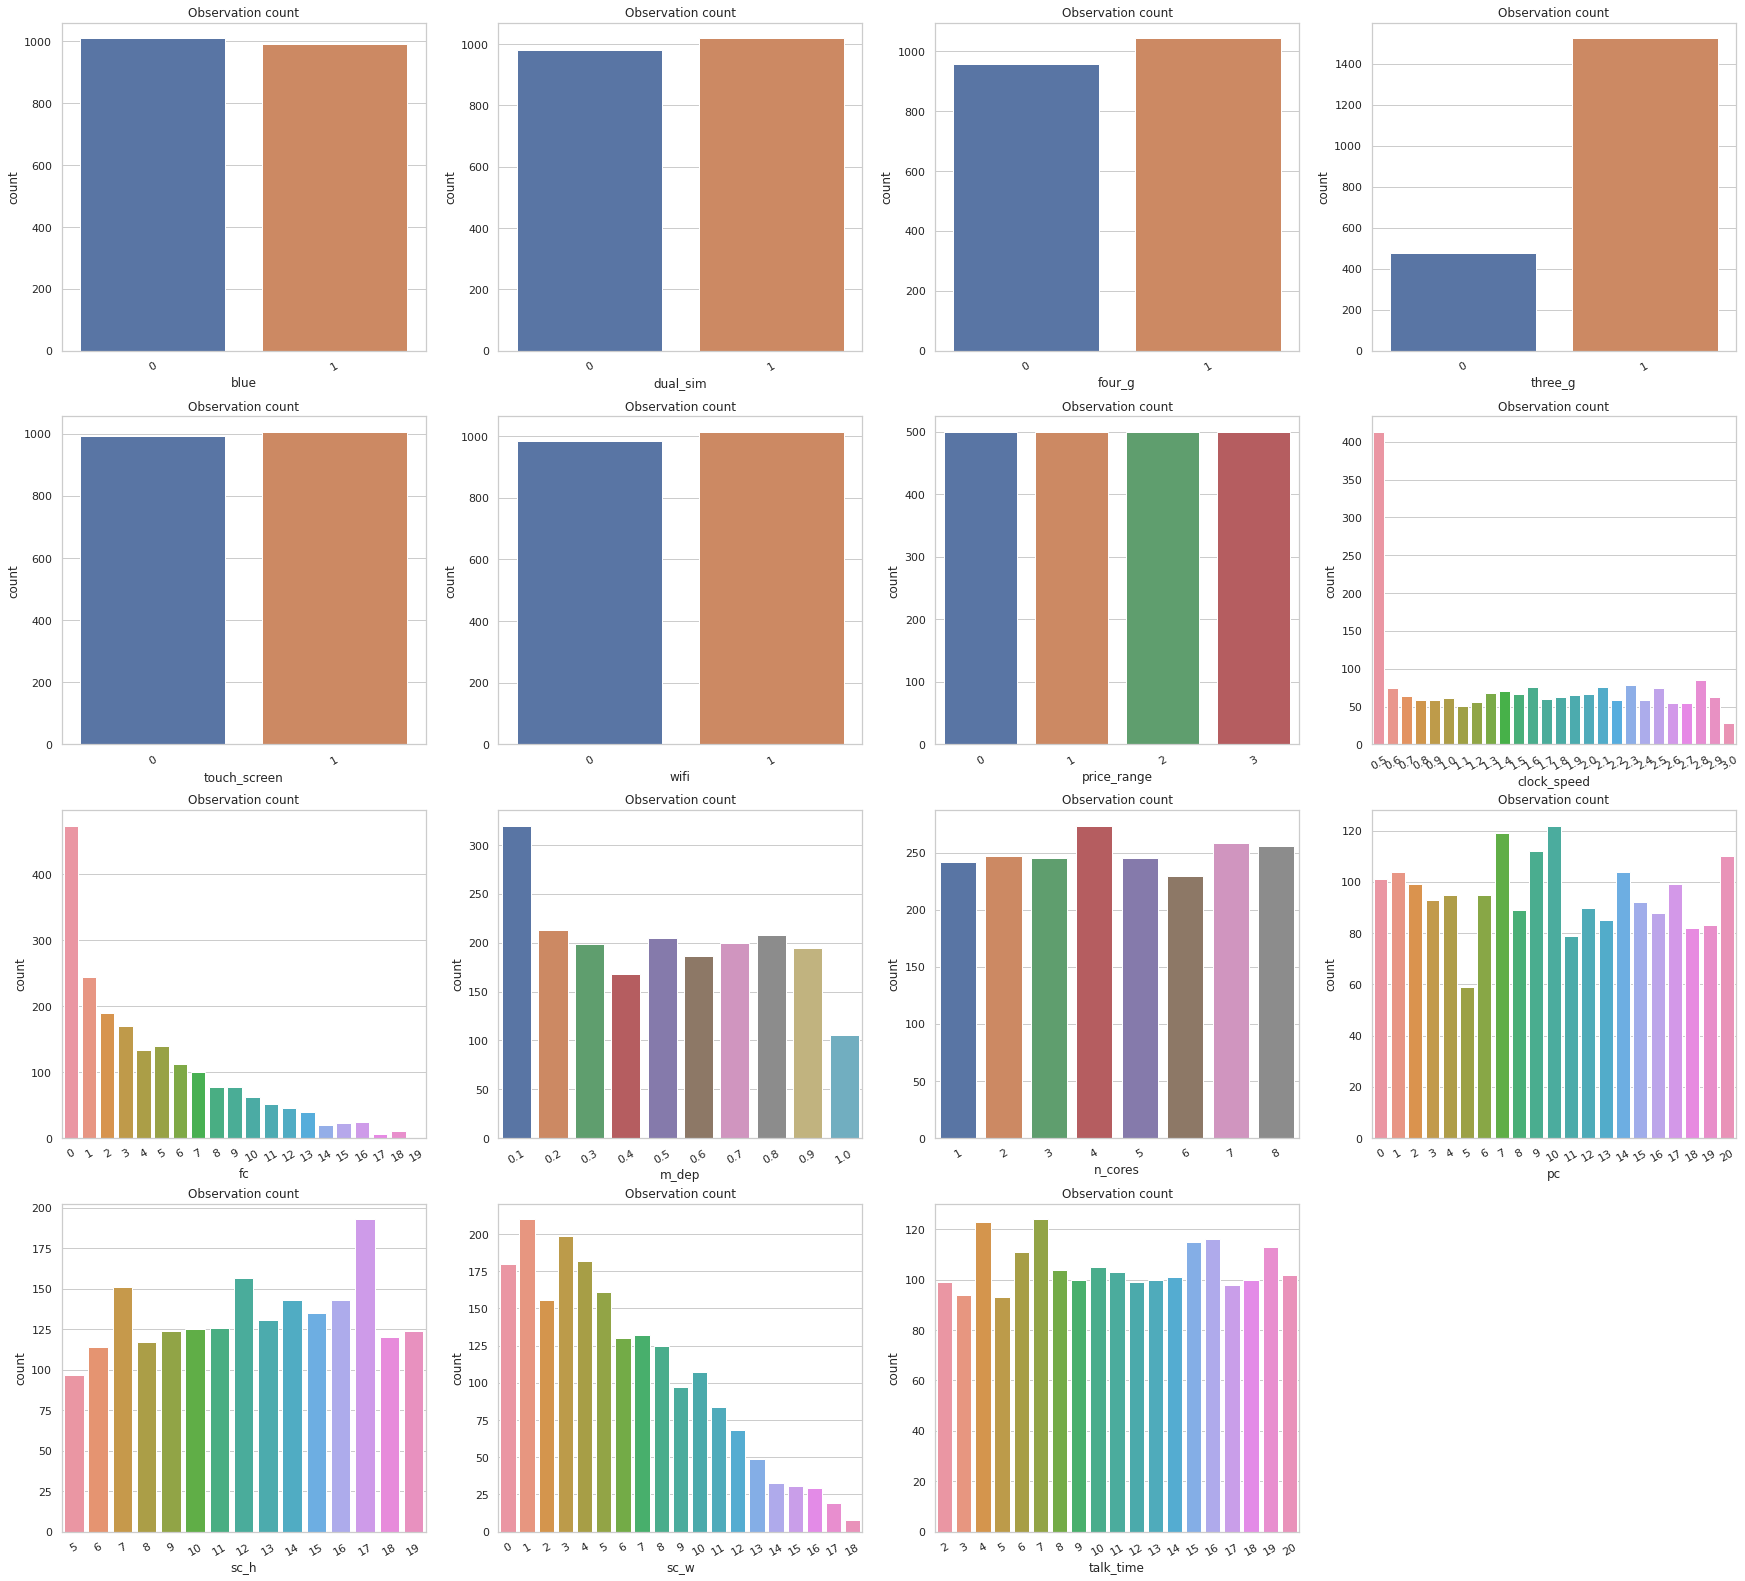

In [ ]:

plt.figure(figsize=(30,35))
i=1
for cat in [ 'blue', 'dual_sim', 'four_g','three_g','touch_screen', 'wifi','price_range','clock_speed', 'fc',  'm_dep', 'n_cores', 'pc','sc_h', 'sc_w', 'talk_time']:

    plt.subplot(5,4,i)
    sns.countplot( x=df[cat] ).set(title=f'Observation count')
    plt.xticks(rotation=30)
   
    i=i+1

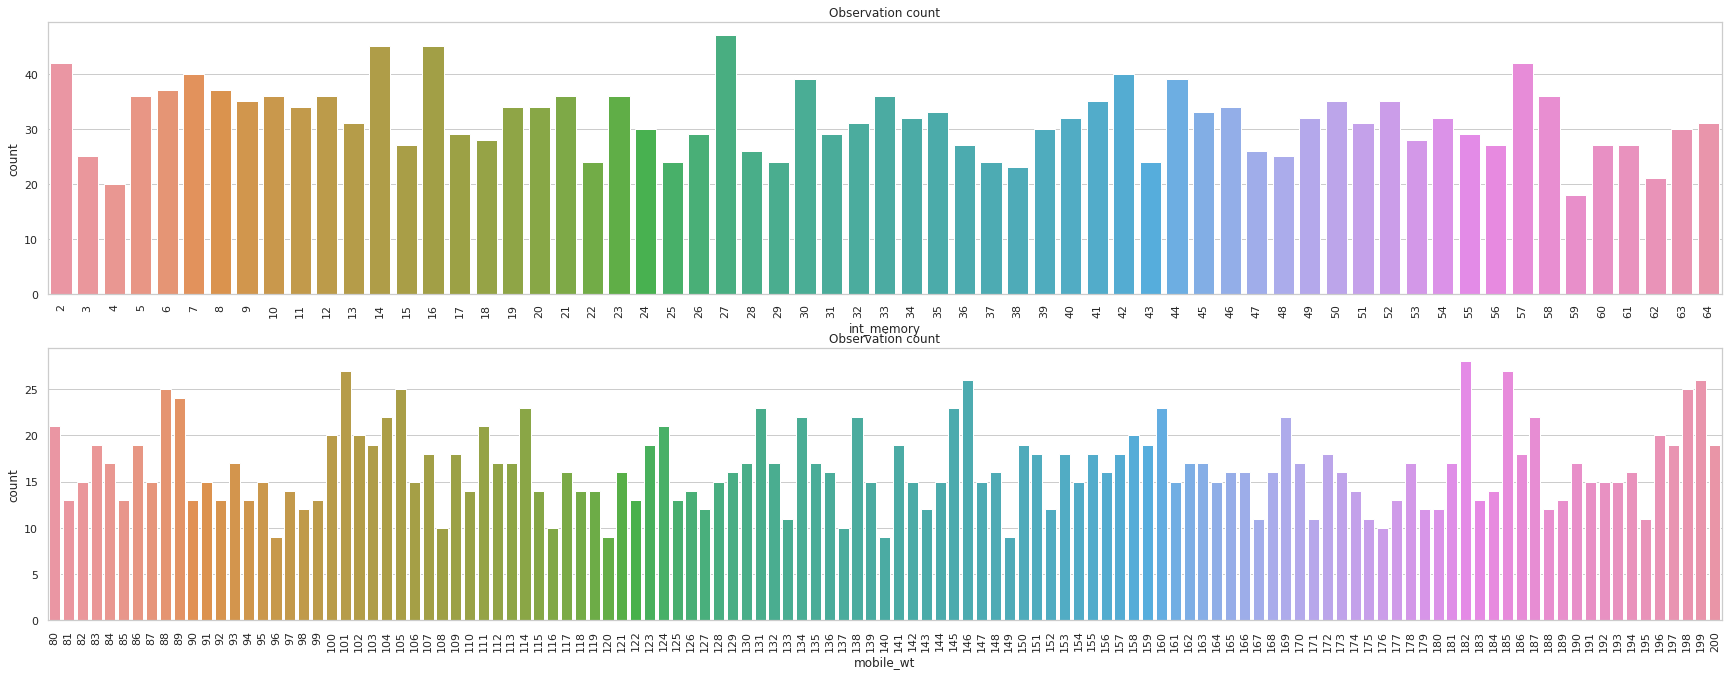

In [ ]:
plt.figure(figsize=(30,35))
i=1
for cat in ['int_memory', 'mobile_wt']:

    plt.subplot(6,1,i)
    sns.countplot( x=df[cat] ).set(title=f'Observation count')
    plt.xticks(rotation=90)
   
    i=i+1

In [ ]:
# sns.pairplot(df[numerical],hue=df)
# plt.show()

## **Multicollinearity**

Text(0.5, 1.0, 'Overall Correlation with Price')

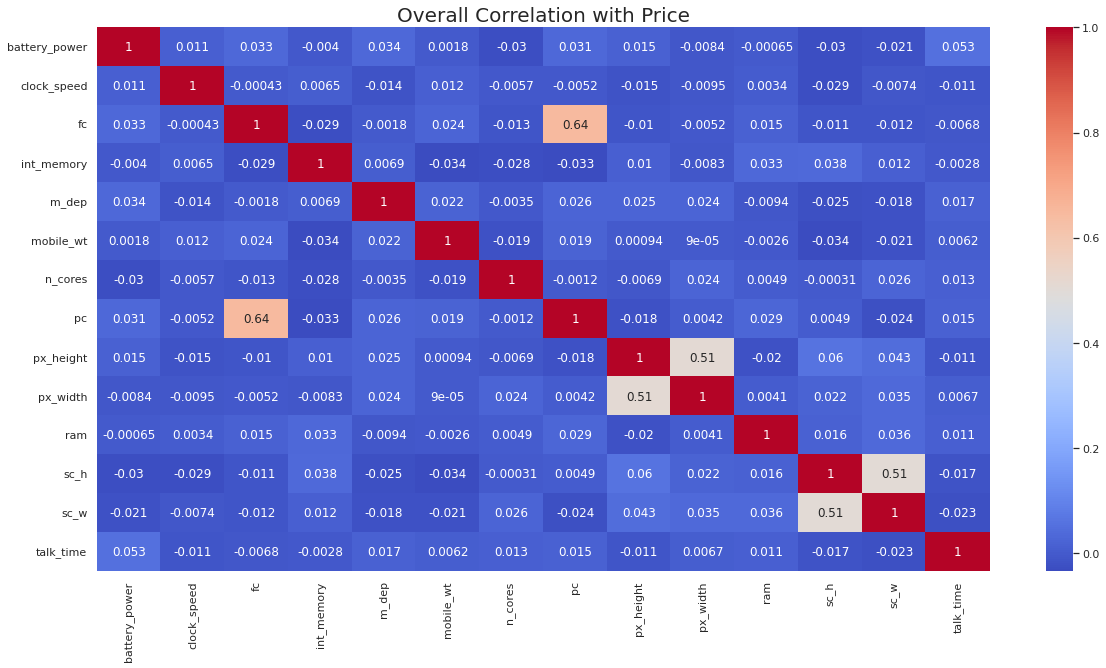

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df[numerical].corr(),annot=True,cmap='coolwarm').set_title('Overall Correlation with Price',fontsize =20)

In [ ]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
# Add constant to df we get df1
df1=add_constant(df)
df1.columns

Index(['const', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# VIF of  dataframe x
def vif(numerical_list):
  # define vif that takes argument as list of columns
    x=df1[numerical_list]
    a=pd.Series([(variance_inflation_factor(x.values,i)) for i in range(x.shape[1])], index=x.columns)
    return (a)

In [ ]:
vif(['const', 'battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 
        'pc','px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'price_range'])

const            89.962177
battery_power     1.501579
clock_speed       1.002874
fc                1.715755
int_memory        1.008629
m_dep             1.005058
mobile_wt         1.013180
n_cores           1.004673
pc                1.719975
px_height         1.507375
px_width          1.499870
ram              11.327465
sc_h              1.354666
sc_w              1.350344
talk_time         1.005001
price_range      12.242197
dtype: float64

**There does not exist any Multicollinearity**

In [ ]:
# Hence after doing VIF and ONEHOTENCODER the Dependent and Independent Variable are
independent=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 
                    'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g','touch_screen', 'wifi']
dependent=['price_range']

## **Preparing DATA for Machine Learning**

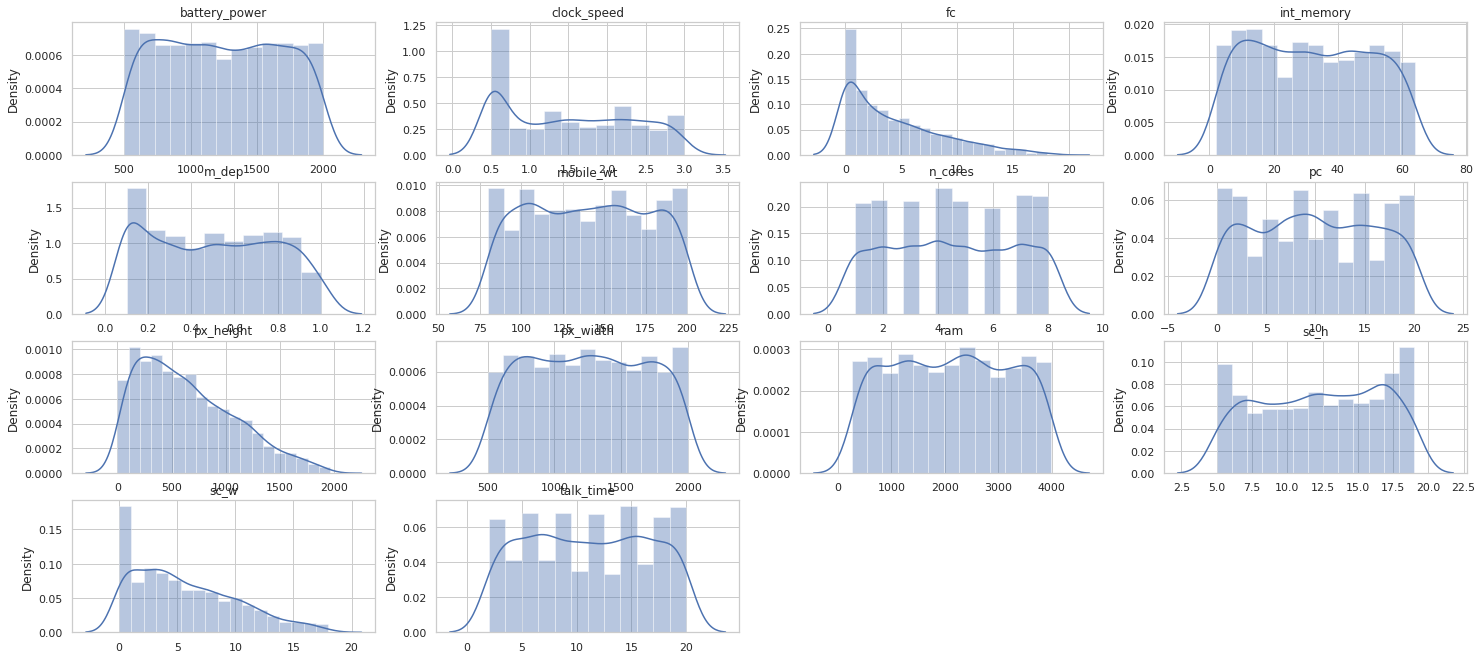

In [ ]:
# Original Feature
plt.figure(figsize=(25,20))
i=1
for cat in ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 
          'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']:

   plt.subplot(7,4,i)             
   sns.distplot(x=df[cat]).set(title=f'{cat}') 
   i=i+1

In [ ]:
# Function Transformed data df1
from sklearn.preprocessing import PowerTransformer
jhon=PowerTransformer(method='yeo-johnson')

df_trasformed=jhon.fit_transform(df)

# convert array feature into dataframe
from pandas.core.frame import DataFrame
df1=DataFrame(df_trasformed,columns=df.columns)

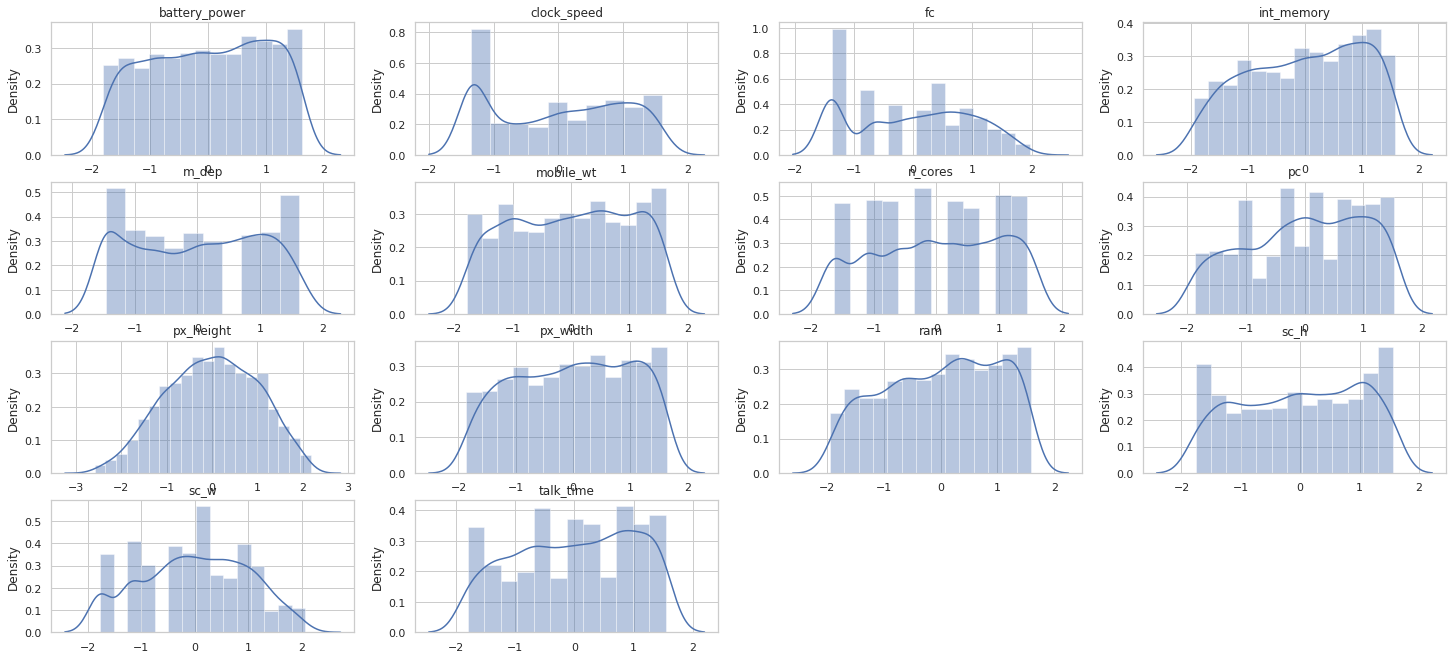

In [ ]:
# Feature after applying yeo-johnson
plt.figure(figsize=(25,20))
i=1
for cat in ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 
          'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']:

   plt.subplot(7,4,i)             
   sns.distplot(x=df1[cat]).set(title=f'{cat}') 
   i=i+1

In [ ]:
df1.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Scaling Independent variable
x=df1.drop(columns=['price_range'])
y=df['price_range']

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df1)

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=0)